In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import glob
import pandas as pd

In [2]:
dir_results = 'retrained_models/metrics'
flist       = glob.glob(f'{dir_results}/*.csv')
RESULTS={}
for k, kf in enumerate(flist): # kf = f_csv
    RESULTS[k] = {}
    RESULTS[k]['lot'] = kf.split('_')[-3]
    RESULTS[k]['trial'] =  kf.split('_')[-2] + '_' +  kf.split('_')[-1].split('.')[0]
    RESULTS[k]['fn'] = kf.split('/')[-1]

    # collect csv data
    work = pd.read_csv(kf)
    RESULTS[k]['val_loss'] = work['val_loss'].to_numpy()
    RESULTS[k]['min_val_loss'] = work['val_loss'].min()
    RESULTS[k]['epoch'] = work['epoch']
        

In [3]:
RESULTS_PD = pd.DataFrame(RESULTS).transpose()
RESULTS_PD = RESULTS_PD.sort_values('min_val_loss')

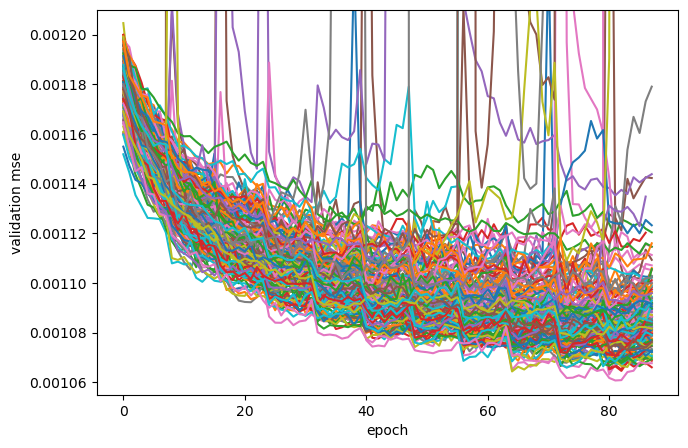

In [4]:
# Showing all top models

fig, ax = plt.subplots()
for k in RESULTS.keys():
    plotdata = RESULTS[k]
    ax.plot(plotdata['val_loss'],label=k)
    
    # dahsed black line:
    # shows "when training was stopped and resumed"
    if False:
        ind_resume = plotdata['epoch'].loc[plotdata['epoch'] ==0 ].index[-1]
        ax.axvline(ind_resume, color='k', ls='--')
    
ax.set_xlabel('epoch')
ax.set_ylabel('validation mse')
ax.set_ylim(0.001055,0.00121)
fig.set_size_inches(7.5,5)

In [5]:
# save top models after step2 retraining
with open('top_models_after_step2.v2.csv', 'w') as f:
    for krank in range(160):
        plotdata = RESULTS_PD.iloc[krank]
        min_epoch = np.argmin(plotdata['val_loss'])
        # which phase?
        which_phase = (plotdata['epoch'].loc[ plotdata['epoch'] ==0 ].index <= min_epoch).sum()
        fn = f"backup_phase-{which_phase}_retrained_models/"+\
             f"step2_{plotdata['lot']}_{plotdata['trial']}.best.h5"
        # write
        f.write(f'{krank+1}, {fn}\n')

Rank1,	backup_phase-11_retrained_models/step2_lot-150_trial_0043.best.h5
Rank2,	backup_phase-11_retrained_models/step2_lot-78_trial_0023.best.h5
Rank3,	backup_phase-9_retrained_models/step2_lot-123_trial_0046.best.h5
Rank4,	backup_phase-11_retrained_models/step2_lot-151_trial_0048.best.h5
Rank5,	backup_phase-10_retrained_models/step2_lot-191_trial_0001.best.h5
Rank6,	backup_phase-11_retrained_models/step2_lot-89_trial_0021.best.h5
Rank7,	backup_phase-10_retrained_models/step2_lot-144_trial_0043.best.h5
Rank8,	backup_phase-11_retrained_models/step2_lot-152_trial_0049.best.h5
Rank9,	backup_phase-11_retrained_models/step2_lot-116_trial_0012.best.h5
Rank10,	backup_phase-11_retrained_models/step2_lot-138_trial_0027.best.h5
Rank11,	backup_phase-10_retrained_models/step2_lot-185_trial_0011.best.h5
Rank12,	backup_phase-11_retrained_models/step2_lot-72_trial_0026.best.h5
Rank13,	backup_phase-11_retrained_models/step2_lot-146_trial_0046.best.h5
Rank14,	backup_phase-9_retrained_models/step2_lot-7

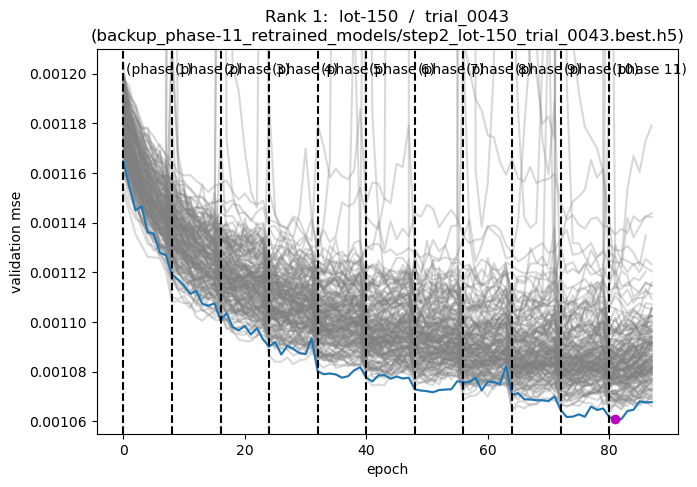

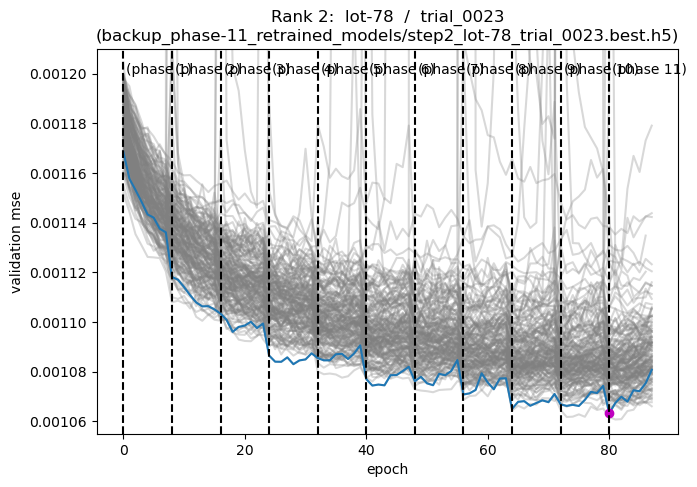

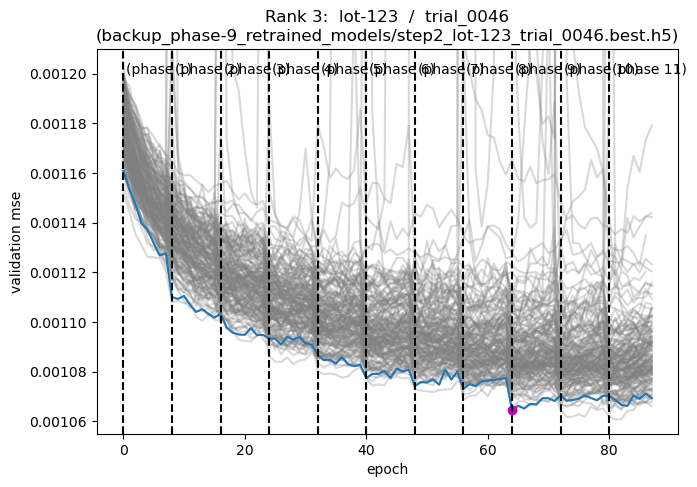

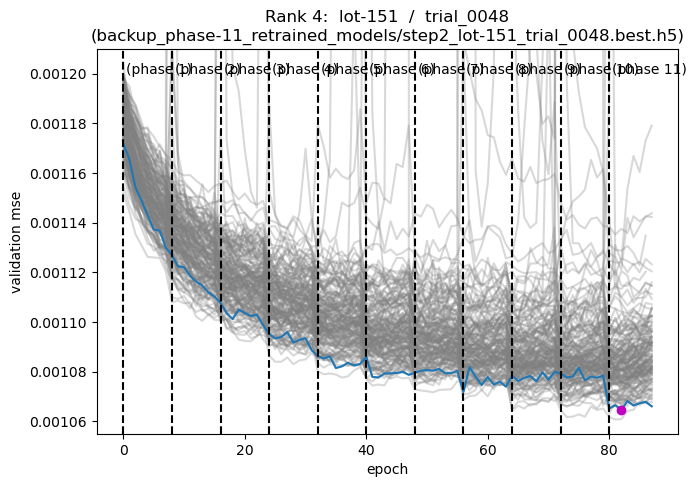

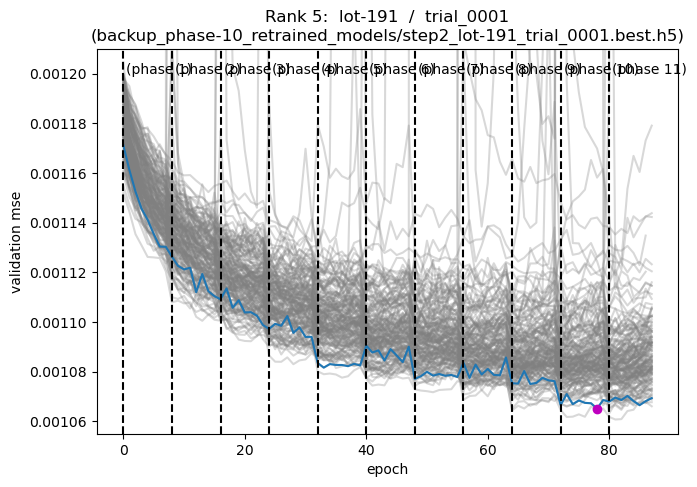

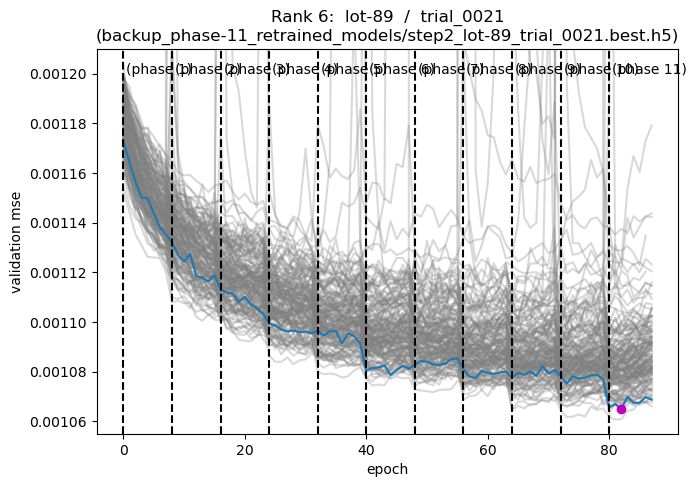

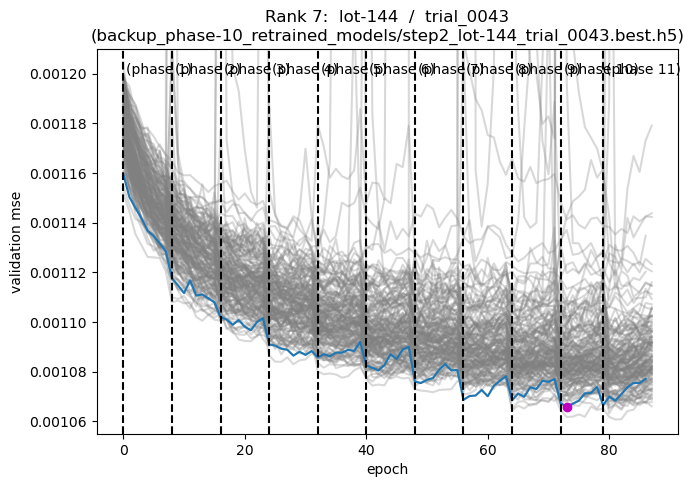

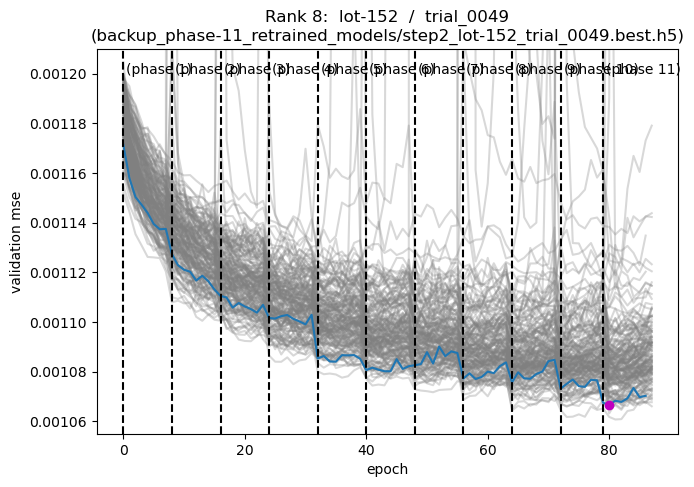

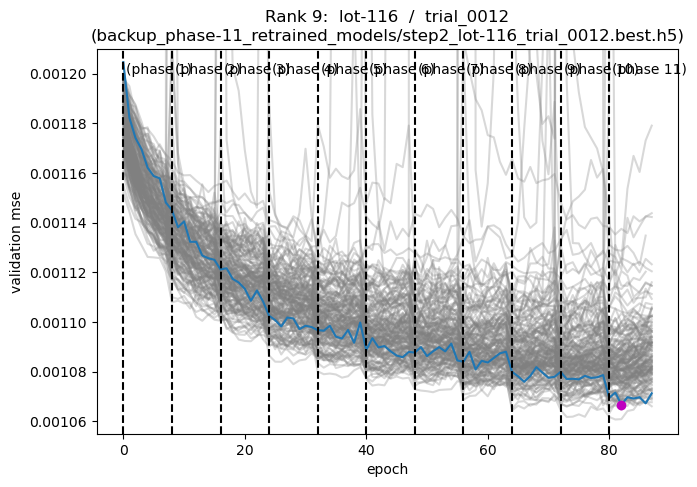

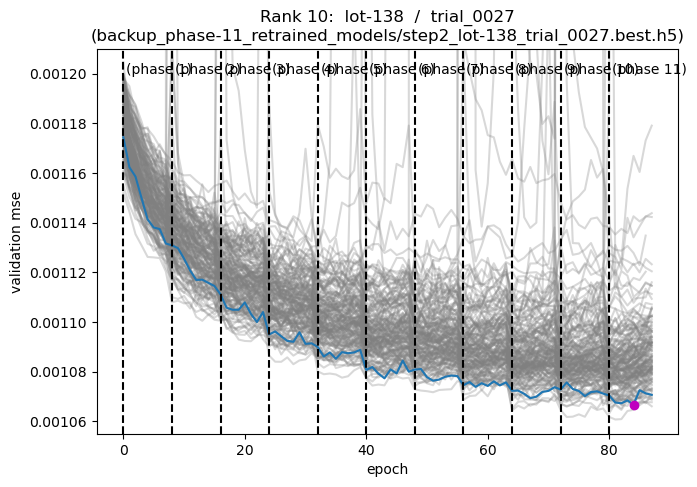

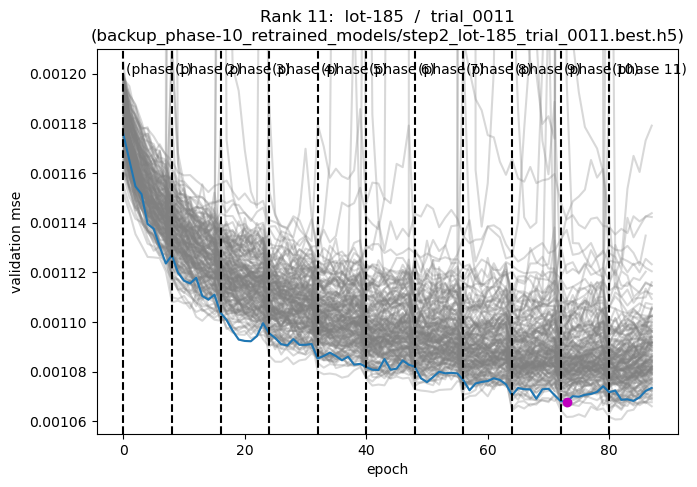

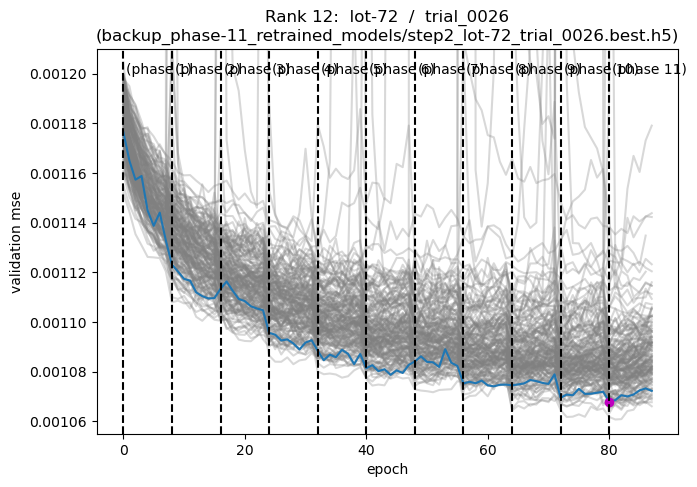

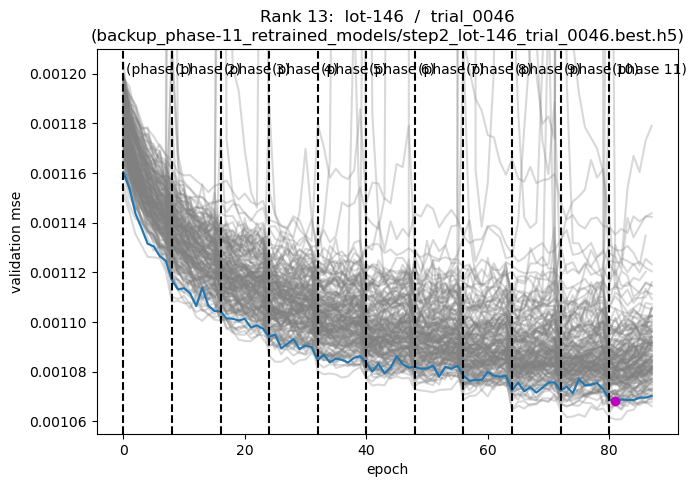

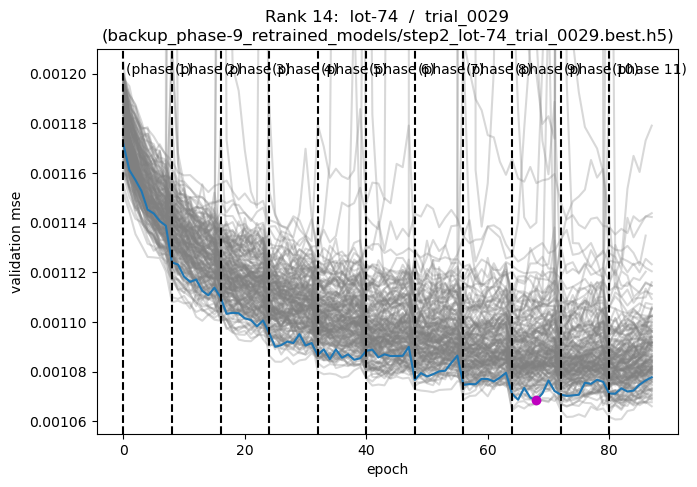

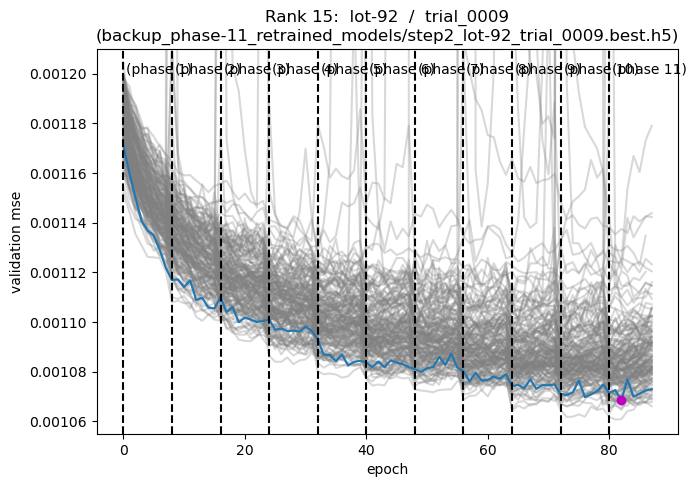

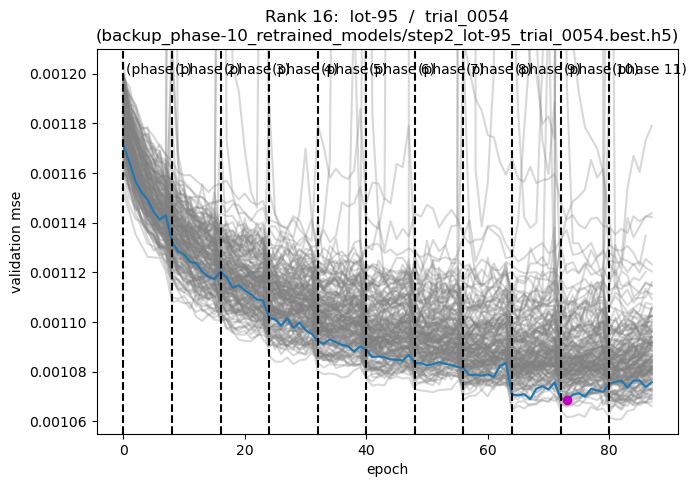

In [6]:
# showing each model individually
# (total trials: 7983)

for krank in range(16):
    
    fig, ax = plt.subplots()
    
    for kgrey in range(len(RESULTS_PD)):
        plotdata_ = RESULTS_PD['val_loss'].iloc[kgrey]
        ax.plot(plotdata_,color='grey',alpha=.3)
    
    plotdata = RESULTS_PD.iloc[krank]
    ax.plot(plotdata['val_loss'],label=k) # line (blue)
    min_epoch = np.argmin(plotdata['val_loss'])
    ax.plot(min_epoch, plotdata['val_loss'][min_epoch],
            marker='o',color='m', ls='none') # dot (magenta)
    
    # dahsed black line:
    # shows "when training was stopped and resumed"
    for kstart, ind_resume in enumerate(plotdata['epoch'].loc[plotdata['epoch'] ==0 ].index):
        ax.axvline(ind_resume, color='k', ls='--')
        ax.text(ind_resume+.5, 0.00120, f'(phase {kstart+1})', ha='left')
    
    # which phase?
    which_phase = (plotdata['epoch'].loc[plotdata['epoch'] ==0 ].index <= min_epoch).sum()
    fn = f"backup_phase-{which_phase}_retrained_models/"+\
         f"step2_{plotdata['lot']}_{plotdata['trial']}.best.h5"
    
    # deco
    ax.set_title(f"Rank {krank+1}:  "+
                 f"{plotdata['lot']}  /  {plotdata['trial']}\n"+\
                 f"({fn})")
                 # f"({plotdata['fn'].replace('metrics.csv','best.h5')})")
    ax.set_xlabel('epoch')
    ax.set_ylabel('validation mse')
    ax.set_ylim(0.001055,0.00121)
    
    fig.set_size_inches(7.5,5)
    
    print(f'Rank{krank+1},\t{fn}')